<a href="https://colab.research.google.com/github/aworklab/everydayPython/blob/main/ex_20220625.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 오늘의 목표
* regressor 
* customer analysis

In [4]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
import plotnine as gg 
from plotnine import ggplot, aes
import os
from datetime import datetime, date, time, timezone, timedelta 

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.decomposition import PCA 
from sklearn.cluster import KMeans
from sklearn.impute import KNNImputer 
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier 
from sklearn.metrics import roc_curve, roc_auc_score, f1_score, accuracy_score, mean_squared_error
import sklearn.datasets as skd

# Regressor

In [6]:
raw = skd.load_wine()
x = pd.DataFrame(raw['data'], columns = raw['feature_names'])
y = raw['target']

In [7]:
x.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [9]:
scaler = StandardScaler()
x_std = scaler.fit_transform(x)
x_std = pd.DataFrame(x_std, columns = x.columns)
x_std.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


In [12]:
res = [KMeans(n_clusters = a).fit(x_std).inertia_ for a in range(1, 9)]

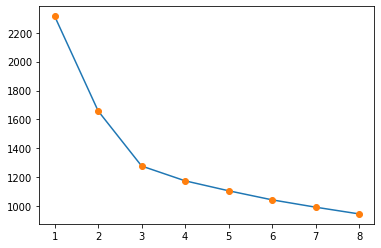

In [14]:
plt.plot(range(1,9), res)
plt.plot(range(1,9), res, 'o')

In [19]:
fit_km = KMeans(n_clusters = 3).fit(x_std)

In [20]:
cl = fit_km.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int32)

In [27]:
pca = PCA(n_components = 8)
fit_pca = pca.fit_transform(x_std)

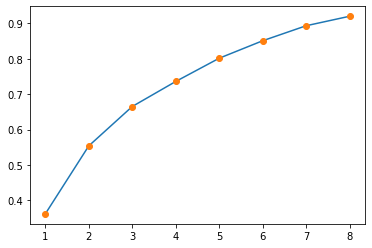

In [18]:
plt.plot(range(1, 9), pca.explained_variance_ratio_.cumsum())
plt.plot(range(1, 9), pca.explained_variance_ratio_.cumsum(), 'o')

In [28]:
fit_pca = pd.DataFrame(np.c_[fit_pca, y.reshape(-1,1), fit_km.labels_.reshape(-1, 1)], columns = [f'pc{a}' for a in range(1, 9)] + ['y', 'cl'])
fit_pca.head()

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,y,cl
0,3.316751,-1.443463,-0.165739,-0.215631,0.693043,-0.223880,0.596427,0.065139,0.0,1.0
1,2.209465,0.333393,-2.026457,-0.291358,-0.257655,-0.927120,0.053776,1.024416,0.0,1.0
2,2.516740,-1.031151,0.982819,0.724902,-0.251033,0.549276,0.424205,-0.344216,0.0,1.0
3,3.757066,-2.756372,-0.176192,0.567983,-0.311842,0.114431,-0.383337,0.643593,0.0,1.0
4,1.008908,-0.869831,2.026688,-0.409766,0.298458,-0.406520,0.444074,0.416700,0.0,1.0


In [30]:
fit_pca = fit_pca.assign(cl = fit_pca['cl'].replace({1:0, 2:1, 0:2}).astype(str),
                         y = fit_pca['y'].astype(str)
                         )
fit_pca.head()

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,y,cl
0,3.316751,-1.443463,-0.165739,-0.215631,0.693043,-0.223880,0.596427,0.065139,0.0,0.0
1,2.209465,0.333393,-2.026457,-0.291358,-0.257655,-0.927120,0.053776,1.024416,0.0,0.0
2,2.516740,-1.031151,0.982819,0.724902,-0.251033,0.549276,0.424205,-0.344216,0.0,0.0
3,3.757066,-2.756372,-0.176192,0.567983,-0.311842,0.114431,-0.383337,0.643593,0.0,0.0
4,1.008908,-0.869831,2.026688,-0.409766,0.298458,-0.406520,0.444074,0.416700,0.0,0.0


In [31]:
accuracy_score(fit_pca['y'], fit_pca['cl'])

0.9662921348314607

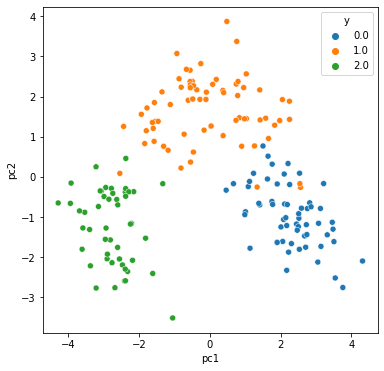

In [32]:
plt.figure(figsize = [6,6])
sns.scatterplot(data = fit_pca, x = 'pc1', y = 'pc2', hue = 'y')

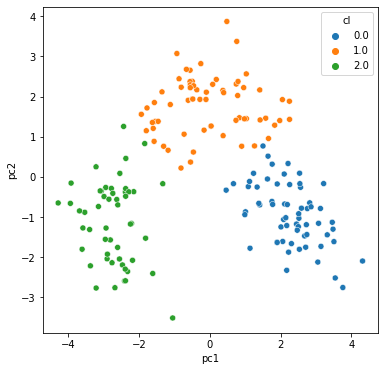

In [33]:
plt.figure(figsize = [6,6])
sns.scatterplot(data = fit_pca, x = 'pc1', y = 'pc2', hue = 'cl')

# Customer Analysis

In [2]:
os.listdir()

['.config',
 'ecommerce-data.csv',
 'rfm_test.csv',
 'sales_train.csv',
 'shops.csv',
 'retail_data_transactions.csv',
 'test.csv',
 'retail_data_response.csv',
 '.Rhistory',
 'items.csv',
 'item_categories.csv',
 'online_retail_II.xlsx',
 'KPMG_VI_New_raw_data_update_final.xlsx',
 'sample_submission.csv',
 'sample_data']

In [3]:
df = pd.read_excel('online_retail_II.xlsx')

In [34]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [35]:
df.columns = [a.replace(' ', '-').lower() for a in df.columns]
df.head()

,invoice,stockcode,description,quantity,invoicedate,price,customer-id,country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [36]:
df = df[(df['country'] == 'United Kingdom') & (~df['invoice'].astype(str).str.contains('C'))]
df.head()

,invoice,stockcode,description,quantity,invoicedate,price,customer-id,country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [37]:
df['date'] = df['invoicedate'].to_numpy().astype('datetime64[D]')
df['month'] = df['date'].to_numpy().astype('datetime64[M]')
df['rev'] = df['quantity'] * df['price']
df.head()

,invoice,stockcode,description,quantity,invoicedate,price,customer-id,country,date,month,rev
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,2009-12-01,2009-12-01,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009-12-01,2009-12-01,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009-12-01,2009-12-01,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,2009-12-01,2009-12-01,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,2009-12-01,2009-12-01,30.0


In [39]:
df = df[['customer-id', 'date', 'month', 'rev']].rename(columns = {'customer-id':'id'})
df.head()

,id,date,month,rev
0,13085.0,2009-12-01,2009-12-01,83.4
1,13085.0,2009-12-01,2009-12-01,81.0
2,13085.0,2009-12-01,2009-12-01,81.0
3,13085.0,2009-12-01,2009-12-01,100.8
4,13085.0,2009-12-01,2009-12-01,30.0


In [40]:
df=  df.sort_values(['id', 'date'] ,ascending = [1,0])
df.head()

,id,date,month,rev
253028,12346.0,2010-06-28,2010-06-01,7.49
253029,12346.0,2010-06-28,2010-06-01,7.49
253030,12346.0,2010-06-28,2010-06-01,7.49
253031,12346.0,2010-06-28,2010-06-01,7.49
253032,12346.0,2010-06-28,2010-06-01,7.49


In [42]:
df = df.groupby(['id', 'date', 'month'])['rev'].sum().reset_index()
df.head()

,id,date,month,rev
0,12346.0,2009-12-14,2009-12-01,90.0
1,12346.0,2009-12-18,2009-12-01,23.5
2,12346.0,2010-01-04,2010-01-01,45.0
3,12346.0,2010-01-14,2010-01-01,22.5
4,12346.0,2010-01-22,2010-01-01,22.5


In [46]:
info_m = df.groupby(['id', 'month'])['rev'].sum().reset_index().rename(columns = {'rev':'money'})
info_m = pd.pivot_table(info_m, index = 'id', columns = 'month', values = 'money').reset_index()
info_m = pd.melt(info_m, id_vars = 'id', var_name = 'month', value_name = 'money')
info_m = info_m.sort_values(['id', 'month'], ascending = [1,0])
info_m = info_m.groupby(['id']).head(3)
info_m = info_m.groupby(['id'])['money'].sum().reset_index()
info_m.head()

,id,money
0,12346.0,0.00
1,12608.0,415.79
2,12745.0,0.00
3,12746.0,0.00
4,12747.0,1801.06


In [47]:
info_f = df.groupby(['id', 'month'])['rev'].count().reset_index().rename(columns = {'rev':'freq'})
info_f = pd.pivot_table(info_f, index = 'id', columns = 'month', values = 'freq').reset_index()
info_f = pd.melt(info_f, id_vars = 'id', var_name = 'month', value_name = 'freq')
info_f = info_f.sort_values(['id', 'month'], ascending = [1,0])
info_f = info_f.groupby(['id']).head(3)
info_f = info_f.groupby(['id'])['freq'].sum().reset_index()
info_f.head()

,id,freq
0,12346.0,0.0
1,12608.0,1.0
2,12745.0,0.0
3,12746.0,0.0
4,12747.0,4.0


In [48]:
df['date'].max()

Timestamp('2010-12-09 00:00:00')

In [49]:
date_now = datetime(2010,12,31)

In [53]:
info_r = df.groupby(['id']).agg({'date' : lambda x : (date_now - x.max()).days}).rename(columns = {'date':'recency'}).reset_index()
info_r.head()

,id,recency
0,12346.0,186
1,12608.0,61
2,12745.0,143
3,12746.0,197
4,12747.0,26


In [55]:
info = pd.merge(pd.merge(info_r, info_f, 'left', 'id'), info_m, 'left', 'id')
info.head()

,id,recency,freq,money
0,12346.0,186,0.0,0.00
1,12608.0,61,1.0,415.79
2,12745.0,143,0.0,0.00
3,12746.0,197,0.0,0.00
4,12747.0,26,4.0,1801.06


In [56]:
info = info.assign(r = pd.qcut(info['recency'], 5, list('12345')),
            f = pd.qcut(info['freq'].rank(method = 'first'), 5, list('54321')),
            m = pd.qcut(info['money'].rank(method = 'first'), 5, list('54321'))
            )
info.head()

,id,recency,freq,money,r,f,m
0,12346.0,186,0.0,0.00,4,5,5
1,12608.0,61,1.0,415.79,3,4,2
2,12745.0,143,0.0,0.00,4,5,5
3,12746.0,197,0.0,0.00,4,5,5
4,12747.0,26,4.0,1801.06,1,1,1


In [57]:
seg_map = {
    r'[1-2][1-2]': 'hibernating',
    r'[1-2][3-4]': 'at_Risk',
    r'[1-2]5': 'cant_loose',
    r'3[1-2]': 'about_to_sleep',
    r'33': 'need_attention',
    r'[3-4][4-5]': 'loyal_customers',
    r'41': 'promising',
    r'51': 'new_customers',
    r'[4-5][2-3]': 'potential_loyalists',
    r'5[4-5]': 'champions'
}

In [58]:
info = info.assign(rf = info['r'].astype(str) + info['f'].astype(str))
info.head()

,id,recency,freq,money,r,f,m,rf
0,12346.0,186,0.0,0.00,4,5,5,45
1,12608.0,61,1.0,415.79,3,4,2,34
2,12745.0,143,0.0,0.00,4,5,5,45
3,12746.0,197,0.0,0.00,4,5,5,45
4,12747.0,26,4.0,1801.06,1,1,1,11


In [59]:
info.assign(rf = info['rf'].replace(seg_map, regex = True))

,id,recency,freq,money,r,f,m,rf
0,12346.0,186,0.0,0.00,4,5,5,loyal_customers
1,12608.0,61,1.0,415.79,3,4,2,loyal_customers
2,12745.0,143,0.0,0.00,4,5,5,loyal_customers
3,12746.0,197,0.0,0.00,4,5,5,loyal_customers
4,12747.0,26,4.0,1801.06,1,1,1,hibernating
...,...,...,...,...,...,...,...,...
3966,18283.0,39,1.0,195.35,2,2,3,hibernating
3967,18284.0,88,1.0,461.68,3,2,2,about_to_sleep
3968,18285.0,317,0.0,0.00,5,4,4,champions
3969,18286.0,133,0.0,0.00,4,4,4,loyal_customers
